In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

%matplotlib inline

In [2]:
df =  pd.read_csv('data/birth.txt')

In [3]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 371
Data columns (total 1 columns):
num_births    372 non-null int64
dtypes: int64(1)
memory usage: 5.8 KB
None


<function matplotlib.pyplot.show>

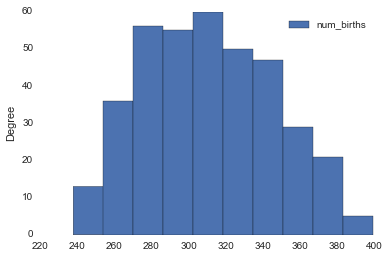

In [4]:
df.plot(kind = 'hist')
plt.show

In [5]:
df.head()

,num_births
0,295
1,286
2,300
3,278
4,272


In [6]:
date_range = pd.date_range(start='1/1/1980',end='12/31/2010', freq='M')
print date_range

<class 'pandas.tseries.index.DatetimeIndex'>
[1980-01-31, ..., 2010-12-31]
Length: 372, Freq: M, Timezone: None


In [7]:
df.set_index(date_range, inplace=True)

In [8]:
print df.head()
print
print
print df.info()

            num_births
1980-01-31         295
1980-02-29         286
1980-03-31         300
1980-04-30         278
1980-05-31         272


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1980-01-31 00:00:00 to 2010-12-31 00:00:00
Freq: M
Data columns (total 1 columns):
num_births    372 non-null int64
dtypes: int64(1)
memory usage: 5.8 KB
None


In [47]:
num_births = pd.Series(df.num_births)
print num_births.values

[295 286 300 278 272 268 308 321 313 308 291 296 294 273 300 271 282 285
 318 323 313 311 291 293 297 273 294 259 276 294 316 325 315 312 292 301
 304 282 313 296 313 307 328 334 329 329 304 312 312 300 317 292 300 311
 345 350 344 336 315 323 322 296 315 287 307 321 354 356 348 334 320 340
 332 302 324 305 318 329 359 363 359 352 335 342 329 306 332 309 326 325
 354 367 362 354 337 345 339 325 345 309 315 334 370 383 375 370 344 355
 346 317 348 331 345 348 380 381 377 376 348 356 344 320 347 326 343 338
 361 368 378 374 347 358 349 323 358 331 338 343 374 380 377 368 346 358
 338 329 347 327 335 336 370 399 385 368 351 362 358 333 356 335 348 346
 374 386 384 372 343 346 346 318 359 328 333 329 366 373 367 363 337 346
 355 314 343 322 336 327 362 366 361 358 327 330 336 326 337 316 331 331
 359 350 356 347 328 336 315 292 322 291 302 310 330 335 333 318 305 313
 301 281 302 291 297 291 311 319 317 317 296 307 295 265 300 271 291 290
 310 318 310 304 285 288 277 260 282 274 288 287 30

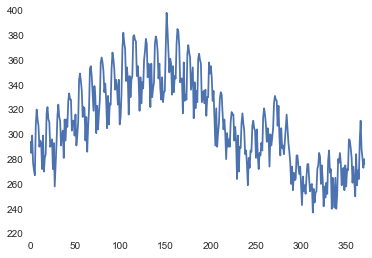

In [10]:
sns.tsplot(num_births);

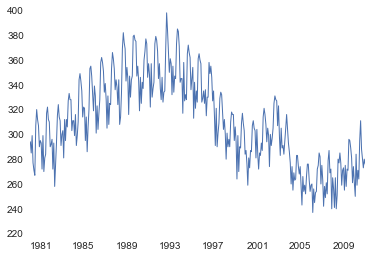

In [11]:
plt.plot(df.index, df.num_births, lw = 1);

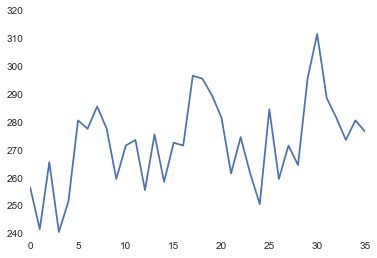

In [12]:
sns.tsplot(num_births['1/1/2008':'12/31/2010'])

In [13]:
quarter_means_resample = df.resample('Q-NOV')
print quarter_means_resample.head()

            num_births
1980-02-29  290.500000
1980-05-31  283.333333
1980-08-31  299.000000
1980-11-30  304.000000
1981-02-28  287.666667


In [14]:
yearly_means_resample = df.resample('A-DEC')
print yearly_means_resample.head()

            num_births
1980-12-31  294.666667
1981-12-31  296.166667
1982-12-31  296.166667
1983-12-31  312.583333
1984-12-31  320.416667


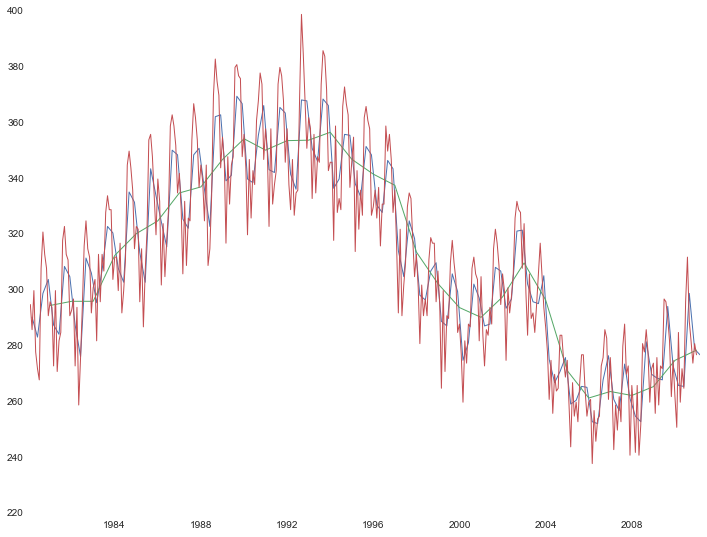

In [15]:
figure = plt.figure(figsize=(12,9))
plt.plot(quarter_means_resample.index, quarter_means_resample.num_births, lw = 1)
plt.plot(yearly_means_resample.index, yearly_means_resample.num_births, lw = 1)
plt.plot(df.index,df.num_births,lw=1)
plt.show()

In [49]:
time = np.arange(1,num_births.size+1)
df_time = pd.DataFrame({
                   'time': time,
                   'time**2':time**2,
                   'time**3':time**3,
                   'time**4':time**4,
                   'time**5':time**5
                   })
X = sm.add_constant(df_time.time.values)
y = num_births.values.reshape(num_births.values.shape[0],1)
print X.shape
print
print y.shape

(372, 2)

(372, 1)


In [112]:
model = OLS(y,sm.add_constant(df_time.time.values))
fit_time = model.fit()
print fit_time.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     133.0
Date:                Fri, 22 May 2015   Prob (F-statistic):           1.72e-26
Time:                        17:33:55   Log-Likelihood:                -1794.5
No. Observations:                 372   AIC:                             3593.
Df Residuals:                     370   BIC:                             3601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        342.4232      3.137    109.148      0.0

In [107]:
fit_time.fittedvalues

array([ 342.25508086,  342.08698113,  341.9188814 ,  341.75078167,
        341.58268193,  341.4145822 ,  341.24648247,  341.07838274,
        340.91028301,  340.74218328,  340.57408355,  340.40598381,
        340.23788408,  340.06978435,  339.90168462,  339.73358489,
        339.56548516,  339.39738542,  339.22928569,  339.06118596,
        338.89308623,  338.7249865 ,  338.55688677,  338.38878703,
        338.2206873 ,  338.05258757,  337.88448784,  337.71638811,
        337.54828838,  337.38018864,  337.21208891,  337.04398918,
        336.87588945,  336.70778972,  336.53968999,  336.37159025,
        336.20349052,  336.03539079,  335.86729106,  335.69919133,
        335.5310916 ,  335.36299186,  335.19489213,  335.0267924 ,
        334.85869267,  334.69059294,  334.52249321,  334.35439348,
        334.18629374,  334.01819401,  333.85009428,  333.68199455,
        333.51389482,  333.34579509,  333.17769535,  333.00959562,
        332.84149589,  332.67339616,  332.50529643,  332.33719

In [111]:
models = []
for t in range(1,len(df_time.columns)+1):
    times = map(str,df_time.columns[:t])
    print times
    model = OLS(y,sm.add_constant(df_time[times].values)).fit()
    models.append(model)
    print model.summary()

['time']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     133.0
Date:                Fri, 22 May 2015   Prob (F-statistic):           1.72e-26
Time:                        17:33:33   Log-Likelihood:                -1794.5
No. Observations:                 372   AIC:                             3593.
Df Residuals:                     370   BIC:                             3601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        342.4232      3.137    109.148

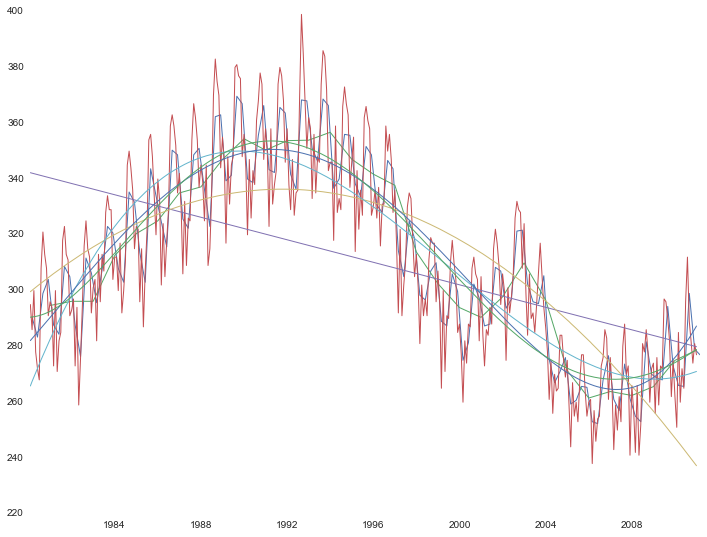

In [106]:
figure = plt.figure(figsize=(12,9))
plt.plot(quarter_means_resample.index, quarter_means_resample.num_births, lw = 1)
plt.plot(yearly_means_resample.index, yearly_means_resample.num_births, lw = 1)
plt.plot(df.index,df.num_births,lw=1)
for i in range(0,len(df_time.columns)):
    plt.plot(df.index,models[i].fittedvalues, lw=1)
plt.show()

In [104]:
monthly_means_resample = df.resample('M')
months = pd.get_dummies(monthly_means_resample)
print monthly_means_resample
print 
print months

            num_births
1980-01-31         295
1980-02-29         286
1980-03-31         300
1980-04-30         278
1980-05-31         272
1980-06-30         268
1980-07-31         308
1980-08-31         321
1980-09-30         313
1980-10-31         308
1980-11-30         291
1980-12-31         296
1981-01-31         294
1981-02-28         273
1981-03-31         300
1981-04-30         271
1981-05-31         282
1981-06-30         285
1981-07-31         318
1981-08-31         323
1981-09-30         313
1981-10-31         311
1981-11-30         291
1981-12-31         293
1982-01-31         297
1982-02-28         273
1982-03-31         294
1982-04-30         259
1982-05-31         276
1982-06-30         294
...                ...
2008-07-31         278
2008-08-31         286
2008-09-30         278
2008-10-31         260
2008-11-30         272
2008-12-31         274
2009-01-31         256
2009-02-28         276
2009-03-31         259
2009-04-30         273
2009-05-31         272
2009-06-30 